<a href="https://colab.research.google.com/github/ferneyvega/pruebasistema/blob/main/%C3%81rbol_de_decisi%C3%B3n(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving winequality-red.csv to winequality-red (8).csv
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64
0.0
Series([], dtype: int64)


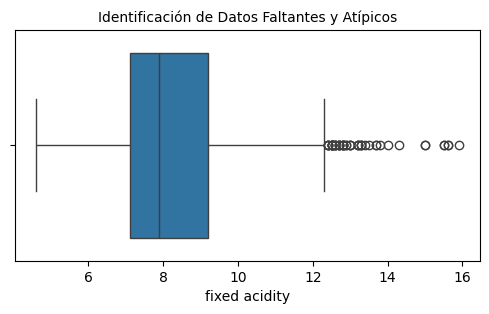

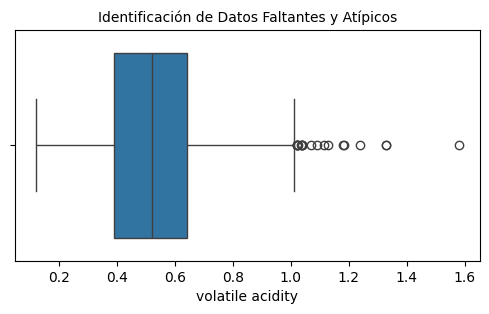

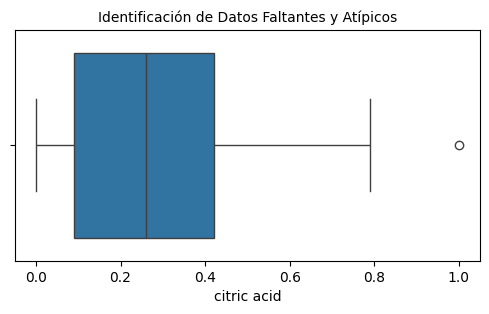

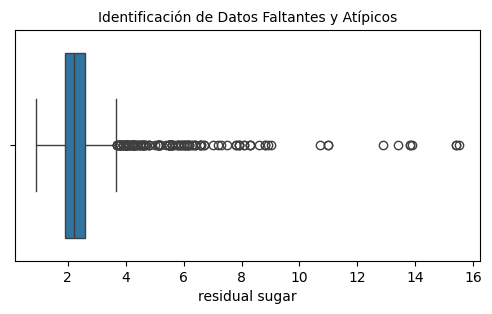

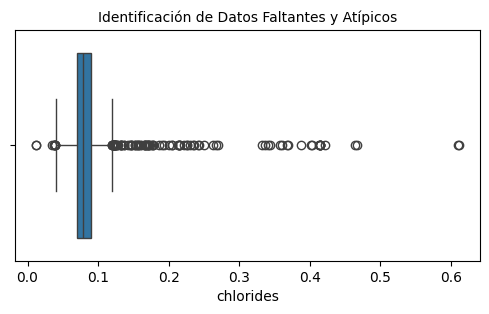

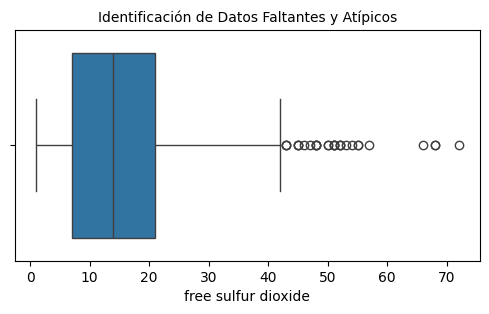

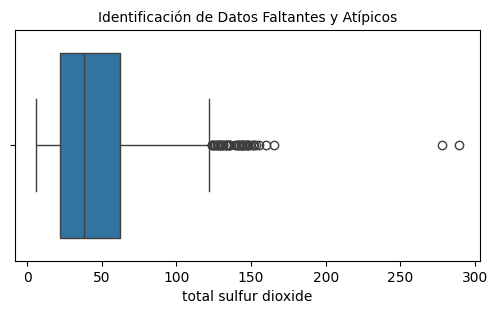

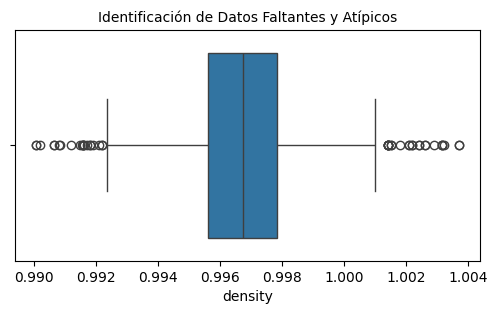

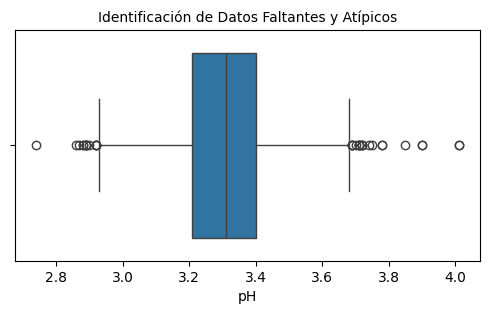

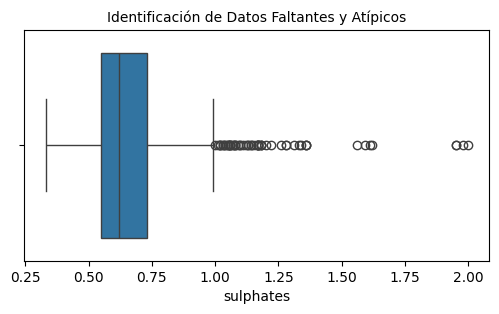

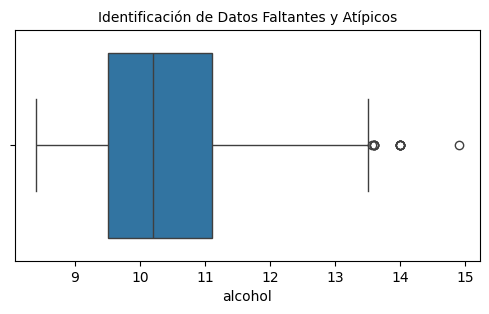

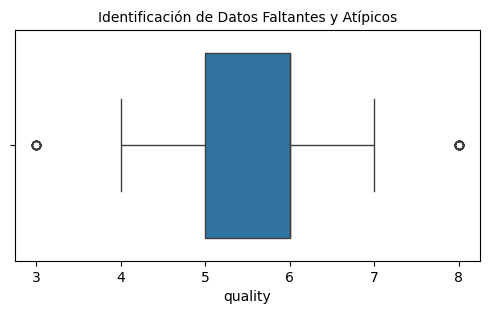

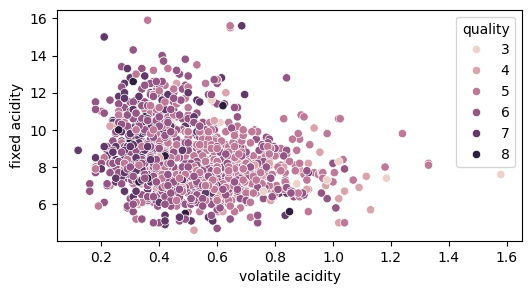

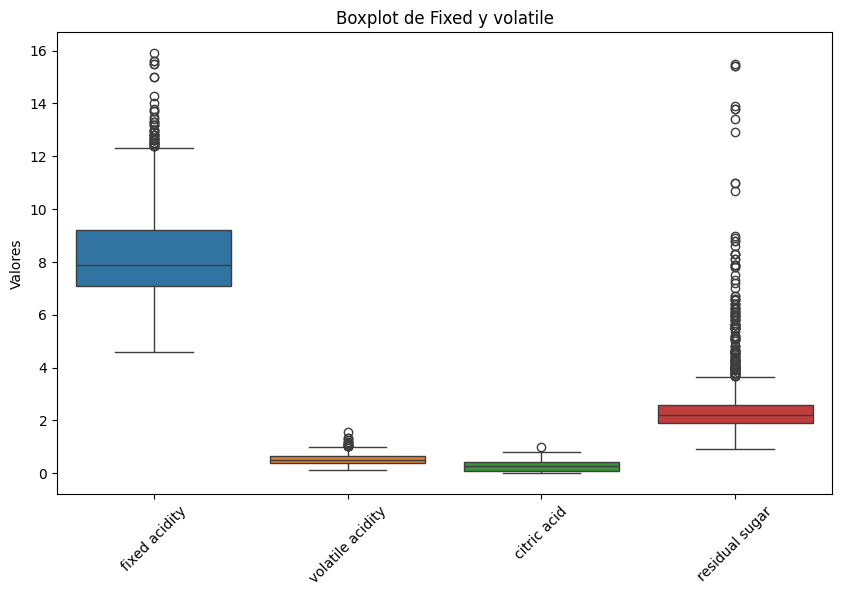

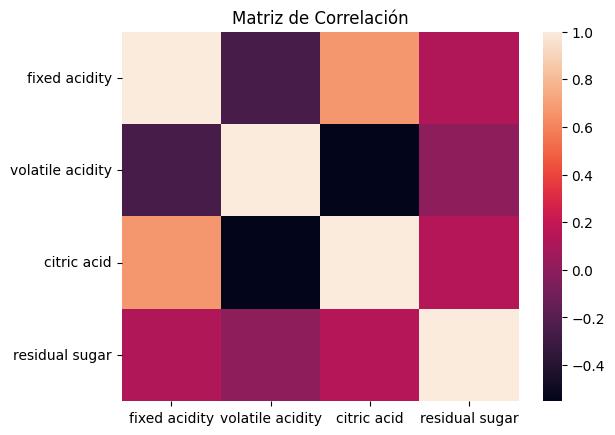

0.5843338070041846

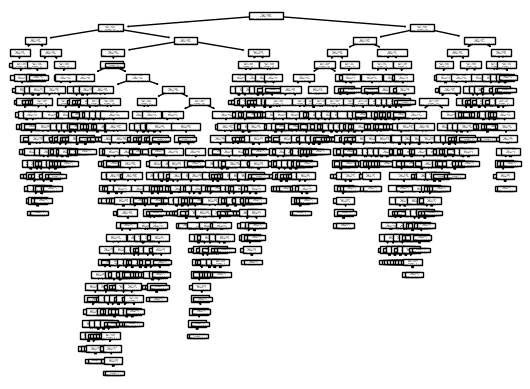

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from google.colab import files
uploaded = files.upload()
import os

os.listdir('/content/')
Datos = pd.read_csv('/content/winequality-red.csv')
Datos.head()
Datos.shape
(150,5)
Datos.describe()

Datos.isna().sum()
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['fixed acidity'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['volatile acidity'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['citric acid'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['residual sugar'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chlorides'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['free sulfur dioxide'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['total sulfur dioxide'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['density'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['pH'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['sulphates'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['alcohol'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['quality'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )
plt.figure(figsize=(6, 3))
valores_faltantes = Datos.isnull().sum()


print(valores_faltantes)

porcentaje_faltantes = (Datos.isnull().sum() / len(Datos)) * 100
print(porcentaje_faltantes)
Q1 = valores_faltantes.quantile(0.25)
Q3 = valores_faltantes.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
outliers = valores_faltantes[(valores_faltantes < (Q1 - 1.5 * IQR)) | (valores_faltantes > (Q3 + 1.5 * IQR))]
print(outliers)



sns.scatterplot(x = "volatile acidity", y = "fixed acidity", hue = "quality", data = Datos)
plt.figure(figsize=(10, 6))
sns.boxplot(data=Datos[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']])
plt.xticks(rotation=45)
plt.title('Boxplot de Fixed y volatile')
plt.ylabel('Valores')
plt.show()
predictors_col = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar"]
target_col = ['quality']
predictors = Datos[predictors_col]
target = Datos[target_col]
predictors
target
corr = predictors.corr()
corr
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)
tree = DecisionTreeClassifier()
arbol = tree.fit(X_train, y_train)
plot_tree(arbol)
predicciones = arbol.predict(X_test)
predicciones
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])
accuracy = accuracy_score(y_test,predicciones)
accuracy
precision = precision_score(y_test, predicciones, average='weighted')
precision
recall = recall_score(y_test, predicciones, average='weighted')
recall
f1 = f1_score(y_test, predicciones, average='weighted')
f1

